<a href="https://colab.research.google.com/github/RafaelCaballero/Julio24/blob/main/code/proyecto7_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la ciencia de datos con Python
Rafa Caballero

### Proyecto 7 - Solución

En esta dirección https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/datav.csv están los datos de una encuesta publicada en abierto por [El Pais](https://elpais.com/espana/2022-01-10/consulte-todos-los-datos-internos-de-la-encuesta-de-el-pais-cuestionarios-cruces-y-respuestas-individuales.html). Entre los atributos hay datos personales, las respuestas a las preguntas y una columna "label" con el partido al que el usuario ha dicho que ha votado. Todos los datos ya están codificados numéricamente, en particular los partidos están codificados como:

"CS"-->0,"PP"-->1,"PSOE"-->2,"UP"-->3,"VOX"-->4


Lo que queremos es predecir el partido a partir del resto de datos usando árboles de decisión. Nos interesa ver en la matriz de confusión qué votantes se pueden identificar mejor y dibujar el árbol para ver qué atributos se usan para distinguir a los votantes entre sí.

Las funciones para mostrar la matriz de confusión y los diferentes scores ya nos vienen dadas

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer,f1_score, accuracy_score, recall_score,cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import numpy as np


def show_cm(y_real,y_pred):
    labels = list(set(y_real))
    cf_matrix = confusion_matrix(y_real, y_pred, labels=labels)
    ax = sns.heatmap(cf_matrix/sum(cf_matrix), annot=True, fmt='.2', cmap='Blues')

def show_results(y_real,y_pred):
    print("Accuracy ",round(accuracy_score(y_real,y_pred),4),\
              "\nRecall ",round(recall_score(y_real,y_pred,average="macro"),4),\
              "\nKappa ", round(cohen_kappa_score(y_real,y_pred),4),)
    print('\nClassification Report: \n', classification_report(y_real, y_pred))
    show_cm(y_real,y_pred)


In [ ]:
# solución

df = pd.read_csv( "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/datav.csv")
df

,sex,age,hab,prov,ccaa,edu,cs,p1_1,p1_2,p1_3,...,p5_5,p5_6,p5_7,p5_8,p5_9,p5_10,p5_11,p5_12,p6,label
0,2,5,6,8,9,3,7,5,5,5,...,4,4,4,4,4,4,4,4,10,3
1,2,4,5,36,12,4,3,5,4,5,...,5,1,5,1,1,5,1,5,9,0
2,2,6,5,28,13,8,2,5,5,5,...,1,1,2,1,2,1,2,2,10,2
3,2,2,2,35,5,5,7,3,5,3,...,3,6,5,5,3,6,5,3,10,0
4,1,4,2,46,10,4,4,4,2,4,...,5,5,5,5,5,5,5,5,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,5,5,3,10,3,7,4,1,5,...,3,2,2,3,3,1,2,3,0,4
726,1,5,6,50,2,4,5,5,5,4,...,1,6,1,4,1,3,4,6,10,4
727,1,6,3,33,3,6,4,2,2,4,...,2,2,2,2,2,2,2,2,10,1
728,1,3,1,18,1,4,2,3,2,6,...,3,2,2,2,2,3,2,2,10,0


Accuracy  0.4726 
Recall  0.4783 
Kappa  0.3417

Classification Report: 
               precision    recall  f1-score   support

           0       0.26      0.44      0.33        61
           1       0.47      0.63      0.54        52
           2       0.69      0.30      0.41        61
           3       0.53      0.54      0.54        57
           4       0.81      0.48      0.60        61

    accuracy                           0.47       292
   macro avg       0.55      0.48      0.48       292
weighted avg       0.56      0.47      0.48       292



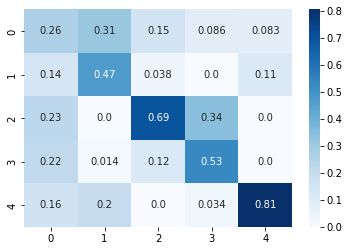

In [ ]:
# Utilizar un árbol de decisión
# 1
label = "label"
XColumns = [c for c in df.columns if c!=label]
yColumn = label
X = df[XColumns]
y = df[yColumn]


# 2
from sklearn.model_selection import train_test_split
test = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

# 3
metodo = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=4,max_depth=3) # es muy poco pero es para dibujarlo después
modelo = metodo.fit(X_train,y_train)

# 4
y_pred = modelo.predict(X_test)
show_results(y_test,y_pred)

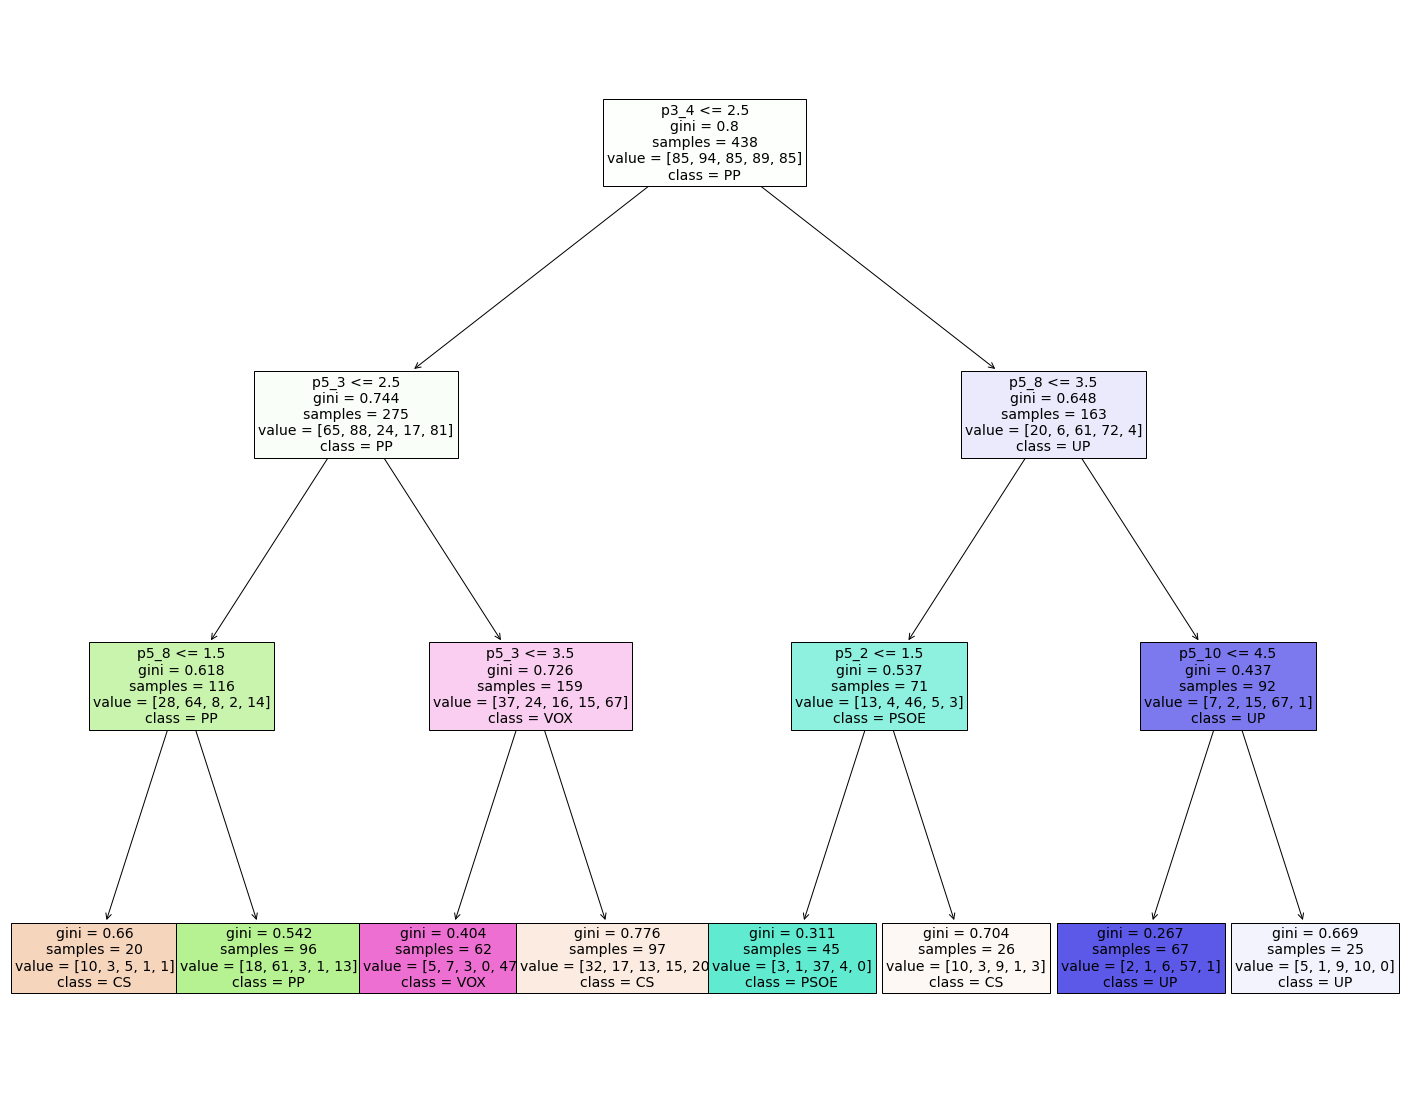

In [ ]:
# mostrar el árbol
fig = plt.figure(figsize=(25,20))
plot_tree(metodo,filled=True,feature_names=XColumns, class_names=["CS","PP","PSOE","UP","VOX"],fontsize="14")
plt.show()